In [1]:
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statistics
sns.set(rc = {'figure.figsize':(15,8)})

     Day    Revenue
0      1   0.000000
1      2  -0.292356
2      3  -0.327772
3      4  -0.339987
4      5  -0.124888
..   ...        ...
726  727  15.722056
727  728  15.865822
728  729  15.708988
729  730  15.822867
730  731  16.069429

[731 rows x 2 columns]


<AxesSubplot:xlabel='Day', ylabel='Revenue'>

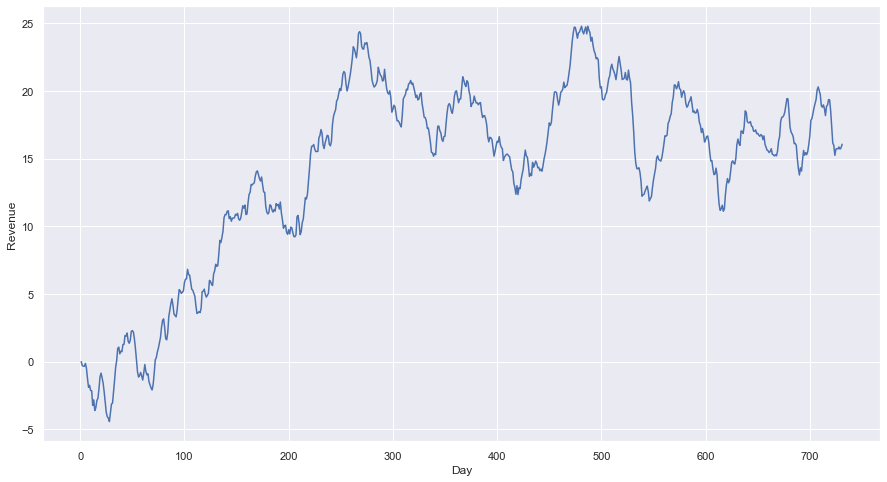

In [2]:
df = pd.read_csv(r'C:\Users\dre2\Desktop\WGU\D213\set\med.csv', parse_dates=True, squeeze=True)
print(df)
sns.lineplot(x='Day', y='Revenue', legend='full', data=df)

In [3]:
df.describe()

,Day,Revenue
count,731.000000,731.000000
mean,366.000000,14.179608
std,211.165812,6.959905
min,1.000000,-4.423299
25%,183.500000,11.121742
50%,366.000000,15.951830
75%,548.500000,19.293506
max,731.000000,24.792249


In [4]:
df.isnull().any()

Day        False
Revenue    False
dtype: bool

In [5]:
import datetime as dt
from datetime import datetime

day1 = dt.datetime.today()
#must specify 1 day extra to account for Day 0 being index
date_list = [day1 + dt.timedelta(days=x) for x in range(731)]

In [6]:
df['Date'] = date_list
df.head()

,Day,Revenue,Date
0,1,0.000000,2023-03-08 14:06:28.191284
1,2,-0.292356,2023-03-09 14:06:28.191284
2,3,-0.327772,2023-03-10 14:06:28.191284
3,4,-0.339987,2023-03-11 14:06:28.191284
4,5,-0.124888,2023-03-12 14:06:28.191284


In [7]:
df['Date'] = pd.to_datetime(df['Date']).dt.date

In [8]:
df.head()

,Day,Revenue,Date
0,1,0.000000,2023-03-08
1,2,-0.292356,2023-03-09
2,3,-0.327772,2023-03-10
3,4,-0.339987,2023-03-11
4,5,-0.124888,2023-03-12


In [9]:
#check stationarity of time series
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 12, cutoff = 0.05):


    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

In [10]:
test_stationarity(df['Revenue'])

Results of Dickey-Fuller Test:
p-value = 0.1997. The series is likely non-stationary.
Test Statistic                  -2.218319
p-value                          0.199664
#Lags Used                       1.000000
Number of Observations Used    729.000000
Critical Value (1%)             -3.439352
Critical Value (5%)             -2.865513
Critical Value (10%)            -2.568886
dtype: float64


In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Revenue'], model='additive', period=12)


<AxesSubplot:>

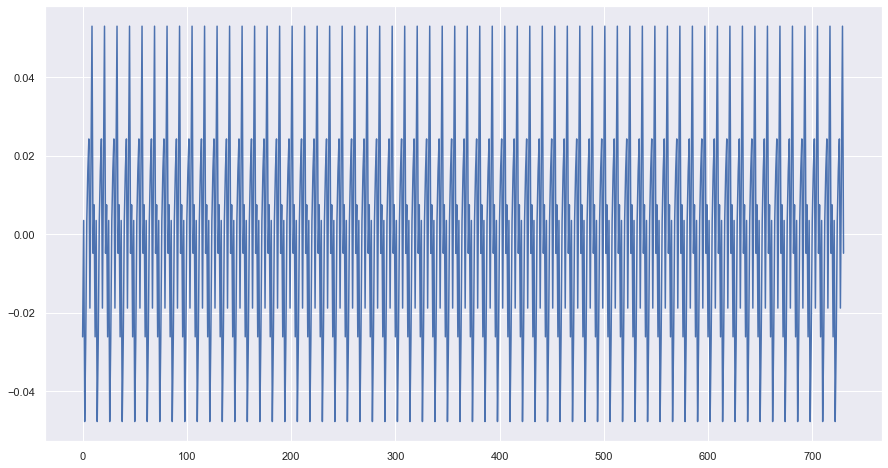

In [12]:
result.seasonal.plot()

<AxesSubplot:>

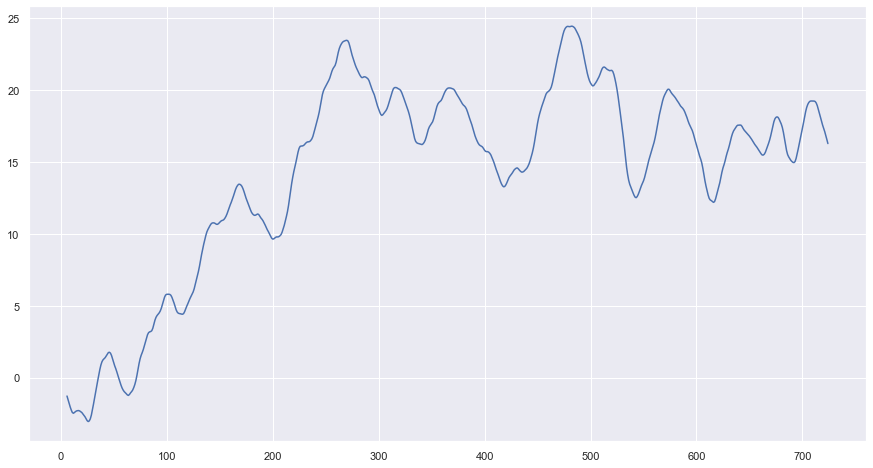

In [13]:
result.trend.plot()

<AxesSubplot:>

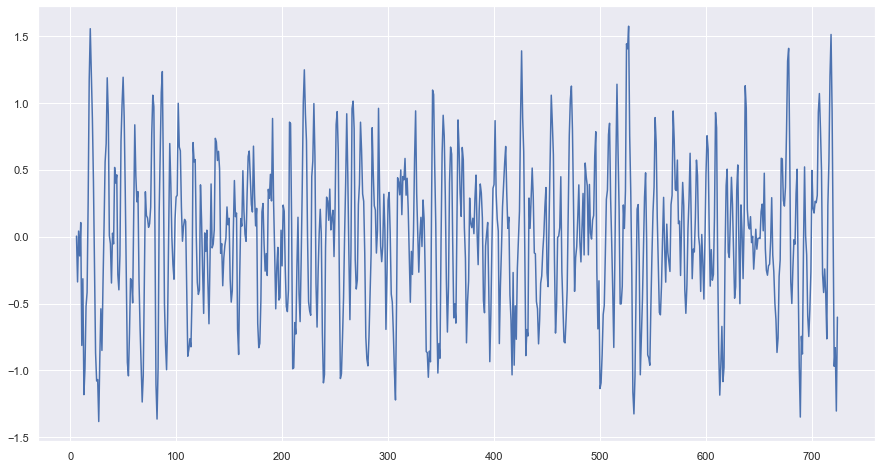

In [14]:
#decompose time series
result.resid.plot()

<Figure size 1080x576 with 0 Axes>

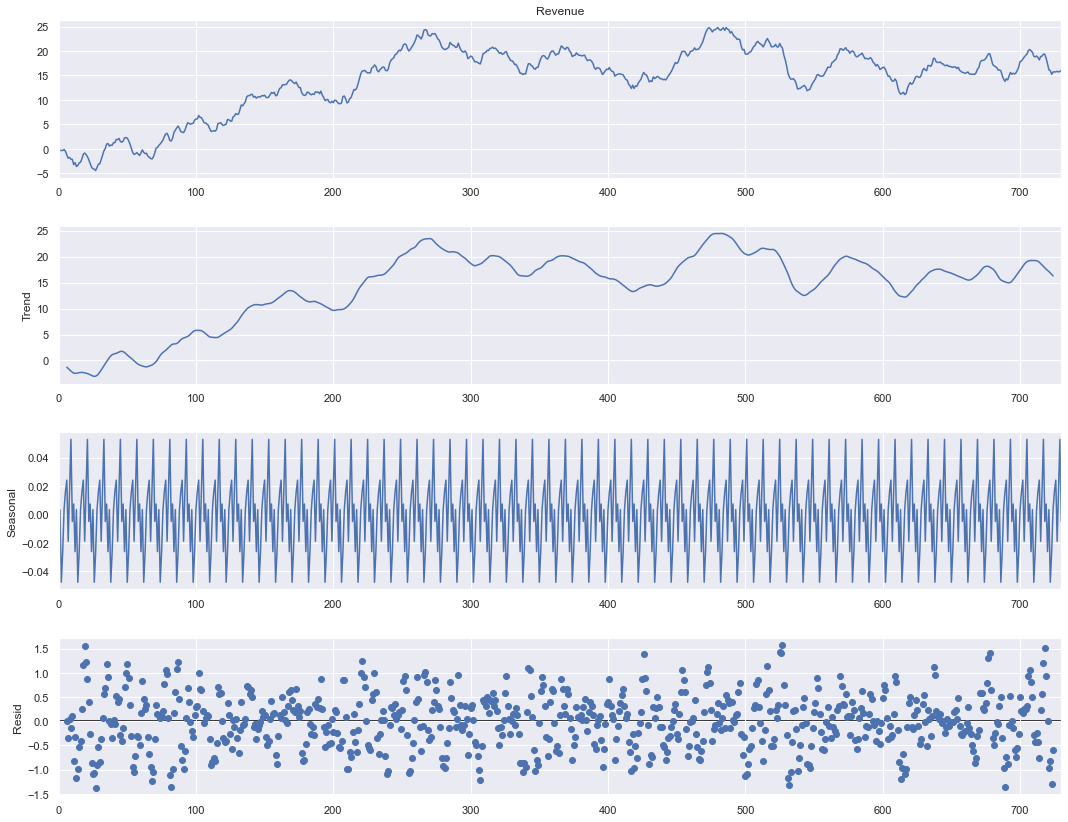

In [15]:
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [16]:
#Make 'Day' column into a datetime object and set as index
import datetime as dt
from datetime import datetime

day1 = dt.datetime.today()
#must specify 1 day extra to account for Day 0 being index
date_list = [day1 + dt.timedelta(days=x) for x in range(731)]

In [17]:
df['Date'] = date_list
df.head()

,Day,Revenue,Date
0,1,0.000000,2023-03-08 14:06:30.793687
1,2,-0.292356,2023-03-09 14:06:30.793687
2,3,-0.327772,2023-03-10 14:06:30.793687
3,4,-0.339987,2023-03-11 14:06:30.793687
4,5,-0.124888,2023-03-12 14:06:30.793687


In [18]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
df = df.set_index(['Date'])
df.head()

,Day,Revenue
Date,,
2023-03-08,1,0.000000
2023-03-09,2,-0.292356
2023-03-10,3,-0.327772
2023-03-11,4,-0.339987
2023-03-12,5,-0.124888


In [19]:
del df['Day']
df.head()

,Revenue
Date,
2023-03-08,0.000000
2023-03-09,-0.292356
2023-03-10,-0.327772
2023-03-11,-0.339987
2023-03-12,-0.124888


In [20]:
df.to_csv(r'C:\Users\dre2\Desktop\WGU\D213\cleaned.csv')

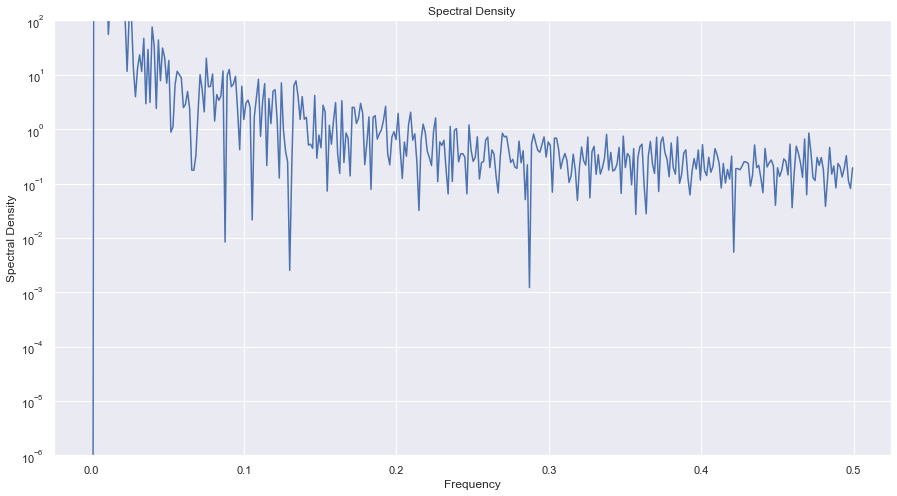

In [21]:
from scipy import signal
f, Pxx_den = signal.periodogram(df['Revenue'])
plt.semilogy(f, Pxx_den)
plt.ylim([1e-6, 1e2])
plt.title("Spectral Density")
plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.show()

In [22]:
pip install pmdarima


  Using cached pmdarima-2.0.2-cp38-cp38-win_amd64.whl (571 kB)
  Using cached statsmodels-0.13.5-cp38-cp38-win_amd64.whl (9.2 MB)
  Using cached packaging-23.0-py3-none-any.whl (42 kB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Attempting uninstall: patsy
    Found existing installation: patsy 0.5.1
    Uninstalling patsy-0.5.1:
      Successfully uninstalled patsy-0.5.1
  Attempting uninstall: packaging
    Found existing installation: packaging 20.9
    Uninstalling packaging-20.9:
      Successfully uninstalled packaging-20.9
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dre2\\anaconda3\\anaconda3_reinstall\\Lib\\site-packages\\~tatsmodels\\tsa\\kalmanf\\kalman_loglike.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [23]:
df.head()

,Revenue
Date,
2023-03-08,0.000000
2023-03-09,-0.292356
2023-03-10,-0.327772
2023-03-11,-0.339987
2023-03-12,-0.124888


In [24]:


import pmdarima as pm
from pmdarima import model_selection
from pmdarima.arima import auto_arima
from pmdarima.model_selection import train_test_split


ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
train=df[:530]
test=df[-201:]
plt.plot(train)
plt.plot(test)

In [ ]:
model=auto_arima(train,start_p=0,d=1,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5,max_D=5,
          max_Q=5, m=90, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)

In [ ]:
model.summary()

In [ ]:
prediction = pd.DataFrame(model.predict(n_periods = 201),index=test.index)
prediction.columns = ['Predicted Revenue']
plt.figure(figsize=(10,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
model.plot_diagnostics()